Data Science + Social Justice<br>
Preprocessing<br>
Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk)

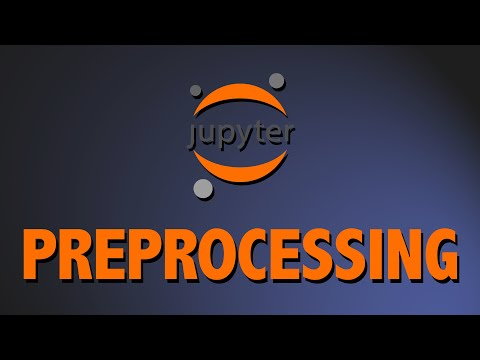

In [1]:
# Please run this cell for the accompanying video.
from IPython.display import YouTubeVideo
YouTubeVideo('MwKx-IxA-88', width=640, height=360)

# Preprocessing

In this notebook we will go over the first step in a Natural Language Processing pipeline: preprocessing text. If you would like to brush up on your basic programming skills first, please check out the two optional notebooks on Python Basics in the "Optional" folder under "Notebooks".

**After completing this notebook, you will be able to:**

1. Work with CSV files in a Pandas Dataframe;
2. Preprocess text from a DataFrame including tokenizing, stopword removal, N-grams extraction, and lemmatization using spaCy;
3. Saving the processed text to the DataFrame.

Please note that the notebooks for this course are intended to be used for **research purposes**. That is, instead of explaining all the code, they are intended for you to focus on your research results and analysis. Still, you will hopefully get a better understanding of Python as you progress through these notebooks.

Keep in mind that some of the code will take a long time to execute.

If you want to understand the code in greater detail, I advise you to come to the optional seminars where you will be able to ask questions. There are also two optional notebooks with Python basics, which will help you get a good foundation for the weeks to come.

When running the notebooks, you should swap out the data used for your own data.

## Navigating around

First, we will use `!pwd` to check the location of our "working directory" (the folder on your computer that Python is connected to). 

In [37]:
# "print" working directory
!pwd

/Users/tomvannuenen/Downloads/DIGHUM160/Data


We can also navigate around by importing the `os` module and using the `chdir()` method.

Our default working directory is wherever we launched the notebook - in our case the "Week 1" folder. We want to access the "Data" folder, which is two levels "up", inside of the main "DIGHUM160" directory. 

We can change the file path in several ways.

- We could type `os.chdir("../")` to go up one level into the "Notebooks" directory.  
- Or, we could type `os.chdir("../../")` to go up **two** levels into the "DIGHUM160" directory
- Or, we could move into the "Data" directory in one line by typing `os.chdir("../../Data")`

In [5]:
import os
# We include two ../ because we want to go two levels up in the file structure
os.chdir('../../Data')

In [6]:
%pwd

'/Users/tomvannuenen/Downloads/DIGHUM160/Data'

Great! Now we can do the magic command `!ls` to list the files in this directory.

In [7]:
!ls

Bargraph.png
BargraphSubreddits.png
NetworkGraph.png
ScatterPlot.png
aita_com_top.csv
aita_com_top_lemmas.json
aita_edges
aita_lda.dict
aita_pos.dict
aita_pos_lda.dict
aita_pos_lda_optimal.model
aita_pos_lda_optimal.model.expElogbeta.npy
aita_pos_lda_optimal.model.id2word
aita_pos_lda_optimal.model.state
aita_pos_lemmas.json
aita_sub_top_lemmas_trigrams.txt
aita_sub_top_med.csv
aita_sub_top_sm.csv
aita_sub_top_sm_lemmas.csv
aita_sub_top_sm_lemmas.txt
aita_sub_top_sm_pos_lemmas.csv
aita_sub_top_sm_pos_lemmas_topics.csv
amitheasshole_3_20220320.csv
convergence_liklihood_1_it_1_pa.pdf
gensim.log


Remember to restart your kernel if your file paths get messed up!


## Working with Pandas

Now that we're in the right folder, we can import a CSV file into a Pandas dataframe. 

In this course we will use a dataset taken from [r/amitheasshole](reddit.com/r/AmItheAsshole). 

The subreddit describes itself as "A catharsis for the frustrated moral philosopher in all of us, and a place to finally find out if you were wrong in an argument that's been bothering you. Tell us about any non-violent conflict you have experienced; give us both sides of the story, and find out if you're right, or you're the asshole."

The subreddit has structures in place that the community follow to come to a decision about the situation. First, OP (original poster) writes up the situation, asking AITA (Am I The Asshole). In response, for eighteen hours, the community of the subreddit will respond to the post with one of five judgements: YTA (You’re The Asshole), NTA (Not The Asshole), ESH (Everyone Sucks Here), NAH (No Assholes Here), or INFO (Not Enough Info).

For more info on the subreddit, see [here]('https://www.inverse.com/culture/am-i-the-asshole/amp'). 

First, we have to retrieve the data. We'll use a subset of the full dataset consisting of the top most popular posts, the assumption being that this will yield the most interesting results. The full dataset is available as well ("aita_sub_full.csv").


In [11]:
import pandas as pd 

# importing file in df
df = pd.read_csv('aita_sub_top_sm.csv')
len(df)

20000

In [12]:
df.dtypes

idint                int64
idstr               object
created              int64
self               float64
nsfw               float64
author              object
title               object
url                float64
selftext            object
score              float64
subreddit           object
distinguish         object
textlen            float64
num_comments       float64
flair_text          object
flair_css_class     object
augmented_at       float64
augmented_count    float64
dtype: object

Here, we import Pandas and use the `read_csv()` method to open the example file. We can show the first few lines of the dataframe using the `.head()` method.

In [13]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,427576402,t3_72kg2a,1506433689,1.0,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,NaN,My girlfriend recently went to the beach with ...,679.0,AmItheAsshole,NaN,4917.0,434.0,no a--holes here,NaN,NaN,NaN
1,551887974,t3_94kvhi,1533404095,1.0,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,NaN,My parents smoke like chimneys. I used to as w...,832.0,AmItheAsshole,NaN,2076.0,357.0,asshole,ass,NaN,NaN
2,552654542,t3_951az2,1533562299,1.0,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,NaN,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,AmItheAsshole,NaN,1741.0,335.0,Shitpost,NaN,NaN,NaN
3,556350346,t3_978ioa,1534254641,1.0,0.0,Pauly104,AITA for eating steak in front of my vegan GF?,NaN,"Yesterday night, me and my GF decided to go ou...",1011.0,AmItheAsshole,NaN,416.0,380.0,not the a-hole,not,NaN,NaN
4,560929656,t3_99yo3c,1535126620,1.0,0.0,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,NaN,"My wife and I are vegetarians, much to my in-l...",349.0,AmItheAsshole,NaN,1158.0,360.0,not the a-hole,not,NaN,NaN


This particular dataset only includes the original posts in the subreddit (so not the comments on the posts). The "selftext" column contains the actual posts.

other columns contain valuable metadata you can use in your analyses, such as: 
- "created" (the time of the post's creation)
- "score" (amount of upvotes minus downvotes)
- "textlen" (amount of words)
- "num_comments" (the amount of comments)
- "distinguish" (posts that have been moderated)
- "nsfw" (posts flagged for NSFW content)
- "flair_text" (a 'tag' that users within a subreddit can add)
- "augmented_count" (how often a user or moderator has edited the text)

Pay special attention to the "NaN" labels, indicating missing values. Also remember the naming convention for the column and row axes (which Pandas uses when accessing particular rows/columns).

In [14]:
# This allows you to quickly see which columns you have
df.columns

Index(['idint', 'idstr', 'created', 'self', 'nsfw', 'author', 'title', 'url',
       'selftext', 'score', 'subreddit', 'distinguish', 'textlen',
       'num_comments', 'flair_text', 'flair_css_class', 'augmented_at',
       'augmented_count'],
      dtype='object')

Let's first remove some columns that we are not going to use.

In [15]:
df = df.drop(['self','url', 'subreddit', 'augmented_at', 'augmented_count'], axis = 1)

Let's get rid of some empty values in our "selftext" column, using the `dropna()` method. On Reddit, removed posts get flagged as "[removed]" or "[deleted]", so we have to get rid of this too. We can do that with the `isin()` method.

In [16]:
df = df[~df['selftext'].isin(['[removed]', '[deleted]' ])].dropna(subset=['selftext'])
len(df)

16313

# 3. Preprocessing

Prepocessing is the very first step of NLP projects. Some commong preprocessing steps are:

- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing stopwords
- Lowercasing
- Tokenization
- Stemming
- Lemmatization

We will use spaCy to do these things. If the text you'd like to process is general-purpose English language text (i.e., not domain-specific, like medical literature), spaCy is ready to use out-of-the-box.

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

parsed_sub = nlp(df.selftext[0])
print(parsed_sub)

My girlfriend recently went to the beach with a few of her friends.  She has this tiny bikini bottom that is basically a thong that I HATE when she wears in public.  Well she wore it.  Not only did she wear it, she posed in the bathroom mirror of her hotel room to take a side profile picture so you could see her ass sticking out in it and posted it to her Snapchat story.   Worth mentioning I am not friends with her on Snapchat for reasons similar to this (sick of getting in fights when she says she's going out for 'girls' night then posts videos of her sitting at a table with like 5 dudes that always got invited by one of the other girls which was completely unknown to her until she arrived - most of these guys she then adds on Snapchat afterwards).  She didn't even save it and send it to me.  I saw it when she was showing me pics from her beach trip and she had screenshot that particular snap and left it in her camera roll.  Whether the ass part was intentional or not I will never kno

Looks the same. What happened under the hood?

In [18]:
for num, sentence in enumerate(parsed_sub.sents):
    print('Sentence {}:'.format(num + 1))
    print(sentence)
    print('')

Sentence 1:
My girlfriend recently went to the beach with a few of her friends.  

Sentence 2:
She has this tiny bikini bottom that is basically a thong that I HATE when she wears in public.  

Sentence 3:
Well she wore it.  

Sentence 4:
Not only did she wear it, she posed in the bathroom mirror of her hotel room to take a side profile picture so you could see her ass sticking out in it and posted it to her Snapchat story.   

Sentence 5:
Worth mentioning

Sentence 6:
I am not friends with her on Snapchat for reasons similar to this (sick of getting in fights when she says she's going out for 'girls' night

Sentence 7:
then posts videos of her sitting at a table with like 5 dudes that always got invited by one of the other girls which was completely unknown to her until she arrived - most of these guys she then adds on Snapchat afterwards).  

Sentence 8:
She didn't even save it and send it to me.  

Sentence 9:
I saw it when she was showing me pics from her beach trip

Sentence 10:
a

In [19]:
for num, entity in enumerate(parsed_sub.ents):
    print('Entity {}:'.format(num + 1), entity, '-', entity.label_)

Entity 1: Snapchat - PERSON
Entity 2: Snapchat - PERSON
Entity 3: 5 - CARDINAL
Entity 4: one - CARDINAL
Entity 5: 24 - DATE
Entity 6: 24 year old - DATE
Entity 7: Snapchat - PERSON
Entity 8: Snapchat - PERSON
Entity 9: Snapchat - PERSON
Entity 10: Snapchat - PERSON
Entity 11: 2 years - DATE
Entity 12: earlier this year - DATE
Entity 13: HEY PUT ON SOME PANTS - WORK_OF_ART
Entity 14: the 2 years - DATE


We can print out a DataFrame with some of the information spaCy has extracted from our text. 


In [20]:
token_text = [token.orth_ for token in parsed_sub][:15]   
token_pos = [token.pos_ for token in parsed_sub][:15]   
token_lemma = [token.lemma_ for token in parsed_sub][:15]
token_entity_type = [token.ent_type_ for token in parsed_sub][:15]
token_stop = [token.is_stop for token in parsed_sub][:15]
token_punct = [token.is_punct for token in parsed_sub][:15]

pd.DataFrame(zip(token_text, token_pos, token_lemma, token_entity_type, token_stop, token_punct),
             columns=['token_text','part_of_speech','token_lemma','entity_type', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,entity_type,token_stop,token_punct
0,My,DET,-PRON-,,True,False
1,girlfriend,NOUN,girlfriend,,False,False
2,recently,ADV,recently,,False,False
3,went,VERB,go,,False,False
4,to,ADP,to,,True,False
5,the,DET,the,,True,False
6,beach,NOUN,beach,,False,False
7,with,ADP,with,,True,False
8,a,DET,a,,True,False
9,few,ADJ,few,,True,False


Turns out spaCy does a *lot* of work. 

- It did parts of speech tagging (nouns, verbs etc.)
- It did named entity recognition (names of people, dates, place names etc.) 
- It lemmatized the text. The goal of lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form called a lemma. For instance, "been" $\Rightarrow$ "be".


## Dealing with leftover tokens

While spaCy's tokenizer is great, it has limitations (like any tokenizer). Language is always domain-specific and our data might contain text that spaCy doesn't properly deal with. 

It is always worth going over some test data to check if your tokenizer works well, and then make some adjustments where needed. For instance, see the following sentence.

In [21]:
test = nlp("That’s actually not true")
tokens = [token.lemma_.lower() for token in test if not token.is_punct]
print(tokens)

['that', '’', 'actually', 'not', 'true']


Looks like spaCy is having some difficulty with certain quotes – even if we tell it to get rid of `token.is_punct`. Let's further investigate:

In [22]:
test = nlp("I’m you're he's he’s That’s that's he’s he's father’s father's")
tokens = [token.lemma_.lower() for token in test if not token.is_punct]
for i, tokens in enumerate(tokens):
    print(i, tokens)

0 -pron-
1 be
2 -pron-
3 be
4 -pron-
5 be
6 -pron-
7 ’s
8 that
9 ’
10 that
11 be
12 -pron-
13 ’
14 -pron-
15 be
16 father
17 ’s
18 father
19 's


How about just adding a little rule of our own: after our first pass, let's remove these

In [23]:
test = nlp("I’m you're he's he’s That’s that's he’s he's father’s father's")
tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-' else token.lower_ for token in test if not token.is_punct and not token.is_digit]
leftover = ["'s",  "’s", "’"]
tokens_c = [token for token in tokens if not token in leftover]
for i, tokens_c in enumerate(tokens_c):
    print(i, tokens_c)

0 i
1 be
2 you
3 be
4 he
5 be
6 he
7 that
8 that
9 be
10 he
11 he
12 be
13 father
14 father


## Processing submissions with spaCy
Now we can scale up to our data.

Let's also define a few helper functions that we'll use for text normalization. In particular, the `lemmatized_sentence_corpus ` generator function will use spaCy to:

- Iterate over the DF
- Segment the threads into individual sentences
- Remove punctuation and excess whitespace
- Lemmatize the text

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

def clean(token):
    """
    helper function to eliminate tokens
    that are pure punctuation, whitespace, or digits
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df):
    """
    generator function to read in text from df
    and get rid of line breaks in the text
    """    
    for text in df.selftext:
        yield text.replace('\n', '')

def preprocess(df, allowed_postags=['NOUN', 'ADJ']):
    for parsed in nlp.pipe(line_read(df), batch_size=1000, disable=["tok2vec", "ner"]):
        lemmas = [token.lemma_.lower() if token.lemma_ != '-PRON-' else token.lower_ for token in parsed if not clean(token)]
        lemmas_c = [l for l in lemmas if not l in ["'s",  "’s", "’"]]
        nostops = [term for term in lemmas_c if term not in spacy.lang.en.stop_words.STOP_WORDS]
        yield ' '.join(nostops)


In [25]:
# This will take a while

lemmas = [line for line in preprocess(df)]

In [50]:
lemmas[0]

'girlfriend recently beach friend tiny bikini basically thong hate wear public wear wear pose bathroom mirror hotel room profile picture stick post snapchat story worth mention friend snapchat reason similar sick fight girl night post video sit table like dude invite girl completely unknown arrive guy add snapchat save send pic beach trip screenshot particular snap leave camera roll ass intentional know claim like way stomach look pic beach black bikini look micro bikini bathroom mirror ocean sand friend tit ass bathroom mirror age typical year old behavior nowadays wrong think inappropriate behavior relationship asshole big deal it?**edit guy let clear try control point time tell wear yes hate ass completely bikini tell wear problem wear general wear summer long despite groaning issue find super annoying yes issue send picture ass snapchat plain simple draw line break wear break turn sideways bathroom mirror stick butt picture send snapchat borderline nude suit wildly inappropriate cl

### Phrase modeling with Gensim

Many kinds of NLP methods work better when using N-grams, as this allows words that frequently appearing together to be concatenated (e.g. "new york" means something different and more specific than "new" and "york" separately).

Phrase modeling is an approach to learning combinations of tokens that together represent meaningful multi-word concepts. We can develop phrase models by looping over the the words in our lemmatized dataset and looking for words that co-occur (i.e., appear one after another) together much more frequently than you would expect them to by random chance. 

Gensim’s `Phrases` model implements bigrams, trigrams, quadgrams, etc. `Phrases` detects phrases based on collocation counts. It builds a model of input text that you then can use on other data.

Gensim detects a bigram if a scoring function for two words exceeds a threshold. The two important arguments to `Phrases` are `min_count` and `threshold`. The higher the values of these parameters, the harder it is for words to be combined to bigrams.

In [38]:
from gensim.models.phrases import Phrases, Phraser

docs = ['new york is great', 'new york is in the united states','i love to stay in new york']

tokens = [doc.split(" ") for doc in docs]
bigram = Phrases(tokens, min_count=1, threshold=3,delimiter=b'_')
bigram_phraser = Phraser(bigram)
[bigram_phraser[token] for token in tokens]

[['new_york', 'is', 'great'],
 ['new_york', 'is', 'in', 'the', 'united', 'states'],
 ['i', 'love', 'to', 'stay', 'in', 'new_york']]

In [55]:
# create bigram and trigram models
lemmas_s = [doc.split(" ") for doc in lemmas]
bigram = Phrases(lemmas_s, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas_s], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_phraser[doc] for doc in texts]

def make_trigrams(texts):
    return [' '.join(trigram_phraser[bigram_phraser[doc]]) for doc in texts]

# Form trigrams
trigrams = make_trigrams(lemmas_s)

In [56]:
trigrams[1]

'parent smoke like chimney use quit wife young son vacation time week invite parent come visit watch son wife date live hour half away spend night come visit occasion tell remind time son bear month ago absolutely smoking address inside outside street car driveway near property want son want ask question big idea know okay morning leave review footage security_camera door dad step driveway smoke time hour wife mom texte dad afterward tell disrespect wish smoke property meet public come house ask stay want stay overnight hotel smoke grandson parent basically think ridiculous smoke brother fine actually true young brother asthma chronic ear infection kid sure exacerbate smoking plus pick year quit grandson danger air thank babysitting babysitte hour carte blanche disrespect wife wish big_deal wonder harsh rule stand maybe nice'

Once our phrase model has been trained on our corpus, we can apply it to new text. When our model encounters two tokens in new text that identifies as a phrase, it will merge the two into a single new token.


In [58]:
trigram_phraser["That", "was", "not", "a", "big", "deal"]

['That', 'was', 'not', 'a', 'big_deal']

In [31]:
len(bigram_phraser.phrasegrams.keys())

96

In [32]:
[bigram for bigram in bigram_phraser.phrasegrams.keys()][:10]

[(b'bathing', b'suit'),
 (b'mash', b'potato'),
 (b'social', b'medium'),
 (b'final', b'straw'),
 (b'ice', b'cream'),
 (b'red', b'flag'),
 (b'credit', b'card'),
 (b'cerebral', b'palsy'),
 (b'fast', b'forward'),
 (b'paternity', b'test')]

## Saving to disk

It can be helpful to have your preprocessed corpus as a .txt file on disk. Here's how you save it as such:

In [33]:
with open('aita_sub_top_sm_lemmas.txt', 'w', encoding='utf_8') as f:
    for l in trigrams:
        f.write(l + '\n')

# Adding to DF 
Finally, let's add our new preprocessed data to our CSV in a new column.

In [34]:
# inserting next to selftext column
df.insert(loc=7, column='lemmas', value=trigrams)
# removing empty rows in lemmas
df = df[~df['lemmas'].isin([''])]

In [35]:
# save to new csv
df.to_csv('aita_sub_top_sm_lemmas.csv', index=False)

In [36]:
 df.head(3)

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,427576402,t3_72kg2a,1506433689,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,My girlfriend recently went to the beach with ...,girlfriend recently beach friend tiny bikini b...,679.0,NaN,4917.0,434.0,no a--holes here,NaN
1,551887974,t3_94kvhi,1533404095,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,My parents smoke like chimneys. I used to as w...,parent smoke like chimney use quit wife young ...,832.0,NaN,2076.0,357.0,asshole,ass
2,552654542,t3_951az2,1533562299,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,hi guy throwaway obv reason i'm female child b...,23.0,NaN,1741.0,335.0,Shitpost,NaN
